In [1]:
import os
import base64
import tensorflow as tf
import unittest

In [2]:
# Get current working directory
current_dir = os.getcwd()

# Append data/mnist.npz to the previous path to get the full path
#data_path = os.path.join(current_dir, "data/mnist.npz")

data_dir = os.path.join(current_dir, "data")


In [3]:
# Load data (discard test set)
#(training_images, training_labels), _ = tf.keras.datasets.mnist.load_data(path=data_path)
(training_images, training_labels), _ = tf.keras.datasets.mnist.load_data(
    path="mnist.npz",   # just filename
   )
print(f"training_images is of type {type(training_images)}.\ntraining_labels is of type {type(training_labels)}\n")

# Inspect shape of the data
data_shape = training_images.shape

print(f"There are {data_shape[0]} examples with shape ({data_shape[1]}, {data_shape[2]})")

training_images is of type <class 'numpy.ndarray'>.
training_labels is of type <class 'numpy.ndarray'>

There are 60000 examples with shape (28, 28)


In [4]:
data_shape


(60000, 28, 28)

In [5]:
# Normalize pixel values
training_images = training_images / 255.0

In [6]:
# GRADED FUNCTION: create_and_compile_model

def create_and_compile_model():
    """Returns the compiled (but untrained) model.

    Returns:
        tf.keras.Model: The model that will be trained to predict predict handwriting digits.
    """

    ### START CODE HERE ###
        
    # Define the model
    model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
     ])

    ### END CODE HERE ###
    
    # Compile the model
    model.compile(
		optimizer='adam',
		loss='sparse_categorical_crossentropy',
		metrics=['accuracy']
	)

    return model

In [7]:
# Save untrained model in a variable
untrained_model = create_and_compile_model()

# Check parameter count against a reference solution
#unittests.parameter_count(untrained_model)

In [25]:
# Use it to predict the first 5 images in the train set
#Setting verbose=False silences the output, so nothing is printed while predicting.
#This takes the first 5 images from your training set. 
#: is slicing, so training_images[:5] is a small batch of 5 images instead of the whole dataset.
predictions = untrained_model.predict(training_images[:5], verbose=False) 
#predictions = untrained_model.predict(training_images[:5])
#predictions = model.predict(test_images)

#predictions will be a NumPy array of shape (5, 10) if your model has 10 output neurons (for 10 digits).
#Each row corresponds to one image, and each column corresponds to the predicted probability for a digit (0–9).

print(f"predictions have shape: {predictions.shape}")

predictions have shape: (5, 10)


In [17]:
# GRADED CLASS: EarlyStoppingCallback

### START CODE HERE ###

# Remember to inherit from the correct class
class EarlyStoppingCallback(tf.keras.callbacks.Callback):

    # Define the correct function signature for on_epoch_end method
    def on_epoch_end(self, epoch, logs={}):
        
        # Check if the accuracy is greater or equal to 0.98
        if (logs.get('accuracy') >= 0.98):
                            
            # Stop training once the above condition is met
            self.model.stop_training = True

            print("\nReached 98% accuracy so cancelling training!") 

### END CODE HERE ###

In [18]:
untrained_model.fit(training_images, training_labels, epochs=10, callbacks=[EarlyStoppingCallback()])
#untrained_model.fit(training_images, training_labels, epochs=4)

Epoch 1/10
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9925 - loss: 0.0237
Reached 98% accuracy so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9914 - loss: 0.0271


In [19]:
# GRADED FUNCTION: train_mnist

def train_mnist(training_images, training_labels):
    """Trains a classifier of handwritten digits.

    Args:
        training_images (numpy.ndarray): The images of handwritten digits
        training_labels (numpy.ndarray): The labels of each image

    Returns:
        tf.keras.callbacks.History : The training history.
    """

    ### START CODE HERE ###

    # Create a compiled (but untrained) version of the model
    # Hint: Remember you already coded a function that does this!
    model = create_and_compile_model()
    
    # Fit the model for 10 epochs adding the callbacks and save the training history
    history = model.fit(training_images, training_labels, epochs=10, callbacks=[EarlyStoppingCallback()])

    ### END CODE HERE ###

    return history

In [20]:
training_history = train_mnist(training_images, training_labels)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9404 - loss: 0.2037
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9756 - loss: 0.0811
Epoch 3/10
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9857 - loss: 0.0468
Reached 98% accuracy so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9840 - loss: 0.0506


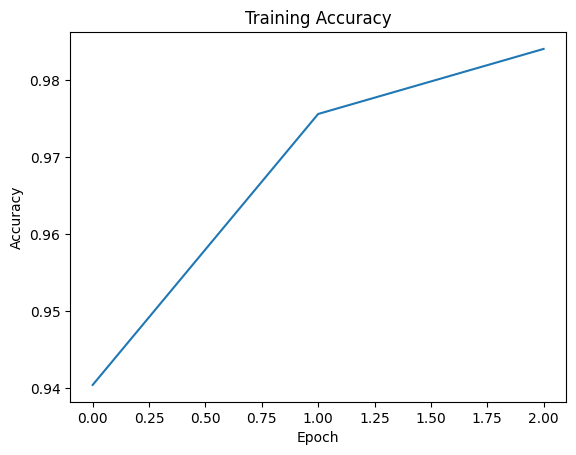

In [21]:
import matplotlib.pyplot as plt

plt.plot(training_history.history['accuracy'])
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

In [23]:
training_history.history

{'accuracy': [0.9404000043869019, 0.975600004196167, 0.9840499758720398],
 'loss': [0.2037305235862732, 0.08112315088510513, 0.05060727521777153]}